In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
import povertymapping.dhs_data_proc as pdhs

In [6]:
dhs_config = dict(
        save_path="../test_data/real_outputs/dhs_ph",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="ph",
        dhs_folder="dhs_ph",
        dhs_zip_folder="PHHR71DT",
        dhs_file="PHHR71FL.DTA",
        country="ph",
        dhs_geo_zip_folder="PHGE71FL",
        dhs_geo_file="PHGE71FL.shp",
    )

In [7]:
!rm -rf {dhs_config['save_path']}

In [8]:
%%time
pdhs.process_dhs_data(dhs_config)

Data Dimensions: (27496, 2472)
Data Dimensions: (1249, 1)


/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 1min 50s, sys: 8.92 s, total: 1min 59s
Wall time: 1min 59s


In [9]:
dhs_ph_base = pd.read_csv(Path(dhs_config['save_path'])/'PHHR71DT_base.csv')

In [10]:
len(dhs_ph_base)

27496

In [12]:
%%time
gdf = gpd.read_file(Path(dhs_config['save_path'])/'PHHR71DT_PHGE71FL_by_cluster.geojson')

CPU times: user 112 ms, sys: 20.2 ms, total: 132 ms
Wall time: 130 ms


In [13]:
gdf.columns

Index(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [18]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf.head()

,DHSCLUST,Wealth Index,DHSID,DHSCC,DHSYEAR,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,1,-31881.608696,PH201700000001,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,GPS,R,6.674652,122.109807,9999.0,10.0,WGS84,POINT (122.10981 6.67465)
1,2,-2855.375000,PH201700000002,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,GPS,R,6.662256,122.132027,9999.0,5.0,WGS84,POINT (122.13203 6.66226)
2,3,-57647.047619,PH201700000003,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,GPS,R,6.621822,122.179496,9999.0,47.0,WGS84,POINT (122.17950 6.62182)
3,4,-54952.666667,PH201700000004,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,GPS,R,6.485298,122.137965,9999.0,366.0,WGS84,POINT (122.13797 6.48530)
4,5,-77819.160000,PH201700000005,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,MIS,R,0.000000,0.000000,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)


In [16]:
import matplotlib.pyplot as plt

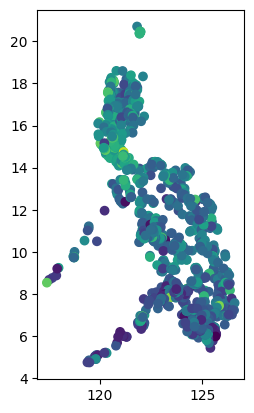

In [20]:
# remove data where lat/long == 0.0
ax = plt.axes()
ax = gdf[gdf.LATNUM > 0.0].plot(column='Wealth Index',ax=ax)

In [19]:
gdf[gdf.LATNUM == 0.0]

,DHSCLUST,Wealth Index,DHSID,DHSCC,DHSYEAR,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
4,5,-77819.160000,PH201700000005,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
19,20,-104656.428571,PH201700000020,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
52,53,-167231.518519,PH201700000053,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,15.0,ARMM,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
90,91,-88621.800000,PH201700000091,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,14.0,Cordillera Admin Region,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
120,121,-54604.461538,PH201700000121,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,14.0,Cordillera Admin Region,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
169,170,-30556.954545,PH201700000170,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,16.0,Caraga,MIS,U,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
181,182,42234.360000,PH201700000182,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,16.0,Caraga,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
185,186,-42180.076923,PH201700000186,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,16.0,Caraga,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
191,192,-63723.080000,PH201700000192,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,16.0,Caraga,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
194,195,35126.052632,PH201700000195,PH,2017.0,NULL,NULL,NULL,NULL,NULL,...,16.0,Caraga,MIS,R,0.0,0.0,9999.0,9999.0,WGS84,POINT (0.00000 0.00000)
